In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


In [ ]:
df = pd.read_csv("cleaned_data.csv" , index_col = 0)
df.head()

,Flavor,Vcpu,Ram,Disk,Price,Provider
0,b2-7,2,7.0,50,0.149,ovh
1,b2-15,4,15.0,100,0.286,ovh
2,b2-30,8,30.0,200,0.577,ovh
3,b2-60,16,60.0,400,1.120,ovh
4,b2-120,32,120.0,400,2.210,ovh


In [ ]:
df[df["Provider"] == "Felcloud"].sort_values("Price" , ascending = True)

,Flavor,Vcpu,Ram,Disk,Price,Provider
30,Atto.S,1,1.0,20,0.0070,Felcloud
27,VM.atto,1,2.0,50,0.0125,Felcloud
31,Atto.M,1,2.0,50,0.0125,Felcloud
32,Atto.L,2,2.0,80,0.0270,Felcloud
33,Femto.S,4,2.0,120,0.0440,Felcloud
55,RAM.XS,2,8.0,50,0.0690,Felcloud
34,Femto.M,2,4.0,130,0.0810,Felcloud
50,CPU.S,8,2.0,100,0.0900,Felcloud
35,Femto.L,4,4.0,150,0.0960,Felcloud
28,VM.nano,4,4.0,150,0.0960,Felcloud


In [ ]:
df["Provider"].value_counts()

Felcloud    35
ovh         18
safozi       5
oxahost      4
Name: Provider, dtype: int64

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Flavor    62 non-null     object 
 1   Vcpu      62 non-null     int64  
 2   Ram       62 non-null     float64
 3   Disk      62 non-null     int64  
 4   Price     62 non-null     float64
 5   Provider  62 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 3.4+ KB
None


In [ ]:
# understand the data set
grouped_df = df.groupby("Provider")["Price"].agg([np.mean,np.median,max,min])
print(grouped_df)
min_max_values = df[["Vcpu", "Ram", "Disk"]].agg(["min", "max"])
print(min_max_values)

              mean  median       max       min
Provider                                      
Felcloud  0.255857  0.1800  1.390000  0.007000
ovh       0.825922  0.4550  3.290000  0.032500
oxahost   0.089583  0.0750  0.172222  0.036111
safozi    0.145833  0.0625  0.479167  0.020833
     Vcpu      Ram  Disk
min     1    0.512    10
max    48  240.000   600


In [ ]:
# normalize data using min-max scaling technique
scaler = MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)

for label in ["Vcpu", "Ram", "Disk" , "Price"]:
    column = df[label].values.reshape(-1, 1)
    df[label + "_norm"] = scaler.fit_transform(column)

In [ ]:
# Define the weights for each attribute
weights = {
    "VCPU": 0.4,
    "RAM": 0.4,
    "Disk": 0.4,
    "Price": 0.1
}
# Calculate a weighted sum or score for each product
df["Score"] = (weights["VCPU"] * df["Vcpu_norm"]) + (weights["RAM"] * df["Ram_norm"]) \
+ (weights["Disk"] * df["Disk_norm"]) + (weights["Price"] * df["Price_norm"])

df


,Flavor,Vcpu,Ram,Disk,Price,Provider,Vcpu_norm,Ram_norm,Disk_norm,Price_norm,Score
0,b2-7,2,7.0,50,0.149,ovh,0.021277,0.027091,0.067797,0.043253,0.050791
1,b2-15,4,15.0,100,0.286,ovh,0.063830,0.060496,0.152542,0.084983,0.119245
2,b2-30,8,30.0,200,0.577,ovh,0.148936,0.123129,0.322034,0.173622,0.255002
3,b2-60,16,60.0,400,1.120,ovh,0.319149,0.248397,0.661017,0.339019,0.525327
4,b2-120,32,120.0,400,2.210,ovh,0.659574,0.498931,0.661017,0.671033,0.794912
...,...,...,...,...,...,...,...,...,...,...,...
57,RAM.M,8,32.0,200,0.190,Felcloud,0.148936,0.131480,0.322034,0.055742,0.246554
58,RAM.L,12,48.0,200,0.290,Felcloud,0.234043,0.198290,0.322034,0.086202,0.310367
59,RAM.XL,16,64.0,200,0.390,Felcloud,0.319149,0.265099,0.322034,0.116662,0.374179
60,RAM.XXL,32,96.0,300,0.690,Felcloud,0.659574,0.398717,0.491525,0.208041,0.640731


In [ ]:
sorted_df = df.sort_values('Score' , ascending = False)
sorted_df

,Flavor,Vcpu,Ram,Disk,Price,Provider,Vcpu_norm,Ram_norm,Disk_norm,Price_norm,Score
61,RAM.XXXL,48,128.000,500,0.850000,Felcloud,1.000000,0.532336,0.830508,0.256777,0.970815
14,r2-240,16,240.000,400,1.930000,ovh,0.319149,1.000000,0.661017,0.585745,0.850641
9,c2-120,32,120.000,400,3.290000,ovh,0.659574,0.498931,0.661017,1.000000,0.827809
4,b2-120,32,120.000,400,2.210000,ovh,0.659574,0.498931,0.661017,0.671033,0.794912
54,CPU.XXL,48,24.000,500,0.650000,Felcloud,1.000000,0.098076,0.830508,0.195857,0.791019
...,...,...,...,...,...,...,...,...,...,...,...
23,VPS S,1,4.000,40,0.036111,oxahost,0.000000,0.014564,0.050847,0.008867,0.027051
15,d2-2,1,2.000,25,0.032500,ovh,0.000000,0.006213,0.025424,0.007767,0.013432
19,SBox 1G,1,1.024,20,0.034722,safozi,0.000000,0.002138,0.016949,0.008444,0.008479
30,Atto.S,1,1.000,20,0.007000,Felcloud,0.000000,0.002038,0.016949,0.000000,0.007595


In [ ]:

weightage_scenarios = [
    {'VCPU': 0.4, 'RAM': 0.3, 'Disk': 0.2, 'Price': 0.1},
    {'VCPU': 0.3, 'RAM': 0.4, 'Disk': 0.2, 'Price': 0.1},
    {'VCPU': 0.3, 'RAM': 0.2, 'Disk': 0.4, 'Price': 0.1}
]

# Create an empty list to store the DataFrames for each weightage scenario
test_dfs = []

for index , scenario in enumerate(weightage_scenarios):
    # Create a new DataFrame for each weightage scenario
    test_df = pd.DataFrame()
    # Calculate the comparison scores for the current weightage scenario
    test_df['ComparisonScore' + f'_{index + 1}'] = (
        (df['Vcpu_norm'] * scenario['VCPU']) +
        (df['Ram_norm'] * scenario['RAM']) +
        (df['Disk_norm'] * scenario['Disk']) +
        (df['Price_norm'] * scenario['Price'])
    )

    # Append the DataFrame to the list
    test_dfs.append(test_df)

# Concatenate the DataFrames from all weightage scenarios
final_df = pd.concat(test_dfs, axis=1)

# Print the final DataFrame containing the comparison scores for all weightage scenarios
print(final_df)


    ComparisonScore_1  ComparisonScore_2  ComparisonScore_3
0            0.034523           0.035104           0.043245
1            0.082687           0.082354           0.100763
2            0.178282           0.175702           0.215482
3            0.368284           0.361209           0.443733
4            0.612816           0.596751           0.629169
..                ...                ...                ...
57           0.169000           0.167254           0.205365
58           0.226131           0.222556           0.247304
59           0.283262           0.277857           0.289244
60           0.502554           0.476468           0.495030
61           0.751480           0.704714           0.764348

[62 rows x 3 columns]


In [ ]:
result_df = pd.concat([df , final_df] , axis = 1)
# Find duplicate column names
duplicate_columns = result_df.columns[result_df.columns.duplicated()]

# Keep only the first occurrence of each duplicate column
result_df = result_df.loc[:, ~result_df.columns.duplicated()]

result_df

,Flavor,Vcpu,Ram,Disk,Price,Provider,Vcpu_norm,Ram_norm,Disk_norm,Price_norm,Score,ComparisonScore_1,ComparisonScore_2,ComparisonScore_3
0,b2-7,2,7.0,50,0.149,ovh,0.021277,0.027091,0.067797,0.043253,0.050791,0.034523,0.035104,0.043245
1,b2-15,4,15.0,100,0.286,ovh,0.063830,0.060496,0.152542,0.084983,0.119245,0.082687,0.082354,0.100763
2,b2-30,8,30.0,200,0.577,ovh,0.148936,0.123129,0.322034,0.173622,0.255002,0.178282,0.175702,0.215482
3,b2-60,16,60.0,400,1.120,ovh,0.319149,0.248397,0.661017,0.339019,0.525327,0.368284,0.361209,0.443733
4,b2-120,32,120.0,400,2.210,ovh,0.659574,0.498931,0.661017,0.671033,0.794912,0.612816,0.596751,0.629169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,RAM.M,8,32.0,200,0.190,Felcloud,0.148936,0.131480,0.322034,0.055742,0.246554,0.169000,0.167254,0.205365
58,RAM.L,12,48.0,200,0.290,Felcloud,0.234043,0.198290,0.322034,0.086202,0.310367,0.226131,0.222556,0.247304
59,RAM.XL,16,64.0,200,0.390,Felcloud,0.319149,0.265099,0.322034,0.116662,0.374179,0.283262,0.277857,0.289244
60,RAM.XXL,32,96.0,300,0.690,Felcloud,0.659574,0.398717,0.491525,0.208041,0.640731,0.502554,0.476468,0.495030


In [ ]:
result_df = result_df.sort_values(['ComparisonScore_1','ComparisonScore_2','ComparisonScore_3'] , ascending = False)
result_df

,Flavor,Vcpu,Ram,Disk,Price,Provider,Vcpu_norm,Ram_norm,Disk_norm,Price_norm,Score,ComparisonScore_1,ComparisonScore_2,ComparisonScore_3
61,RAM.XXXL,48,128.000,500,0.850000,Felcloud,1.000000,0.532336,0.830508,0.256777,0.970815,0.751480,0.704714,0.764348
9,c2-120,32,120.000,400,3.290000,ovh,0.659574,0.498931,0.661017,1.000000,0.827809,0.645712,0.629648,0.662065
14,r2-240,16,240.000,400,1.930000,ovh,0.319149,1.000000,0.661017,0.585745,0.850641,0.618437,0.686523,0.618726
54,CPU.XXL,48,24.000,500,0.650000,Felcloud,1.000000,0.098076,0.830508,0.195857,0.791019,0.615110,0.524918,0.671404
4,b2-120,32,120.000,400,2.210000,ovh,0.659574,0.498931,0.661017,0.671033,0.794912,0.612816,0.596751,0.629169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,VPS S,1,4.000,40,0.036111,oxahost,0.000000,0.014564,0.050847,0.008867,0.027051,0.015426,0.016882,0.024139
15,d2-2,1,2.000,25,0.032500,ovh,0.000000,0.006213,0.025424,0.007767,0.013432,0.007725,0.008347,0.012189
19,SBox 1G,1,1.024,20,0.034722,safozi,0.000000,0.002138,0.016949,0.008444,0.008479,0.004876,0.005089,0.008052
30,Atto.S,1,1.000,20,0.007000,Felcloud,0.000000,0.002038,0.016949,0.000000,0.007595,0.004001,0.004205,0.007187


In [ ]:
#Top flavors with their respective providers
print("Top 10 flavors")
result_df.iloc[0:10 , [0,5]]

Top 10 flavors


,Flavor,Provider
61,RAM.XXXL,Felcloud
9,c2-120,ovh
14,r2-240,ovh
54,CPU.XXL,Felcloud
4,b2-120,ovh
60,RAM.XXL,Felcloud
53,CPU.XL,Felcloud
8,c2-60,ovh
3,b2-60,ovh
48,Zero.S,Felcloud


In [ ]:
#number of redundancy of the operator Felcloud in the top 10 flavors list
count = result_df.iloc[0:10, 5].value_counts()['Felcloud']
print(count)

5


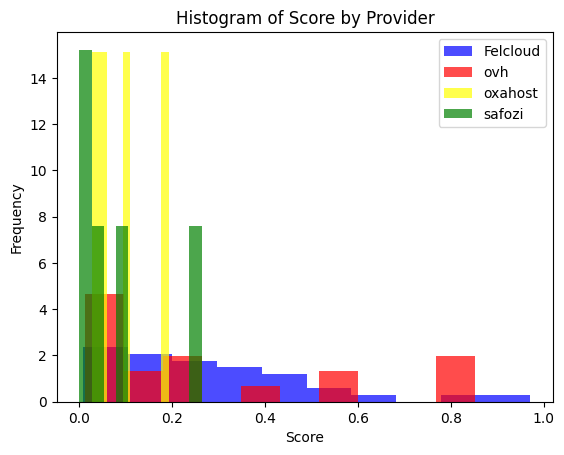

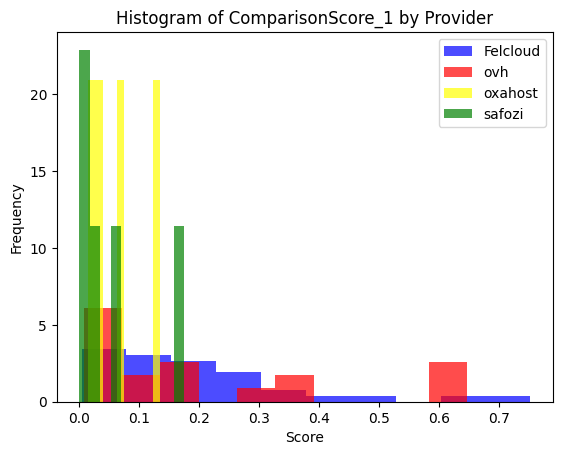

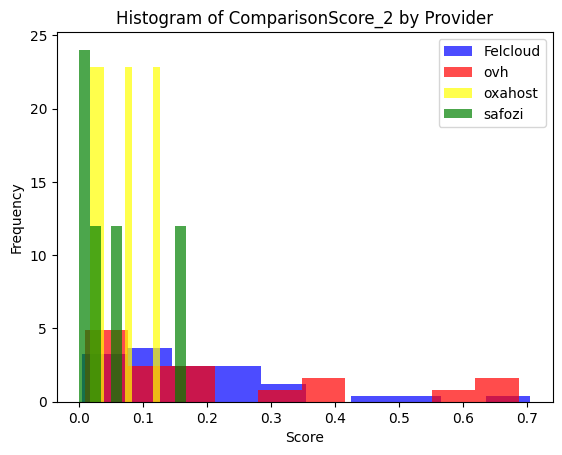

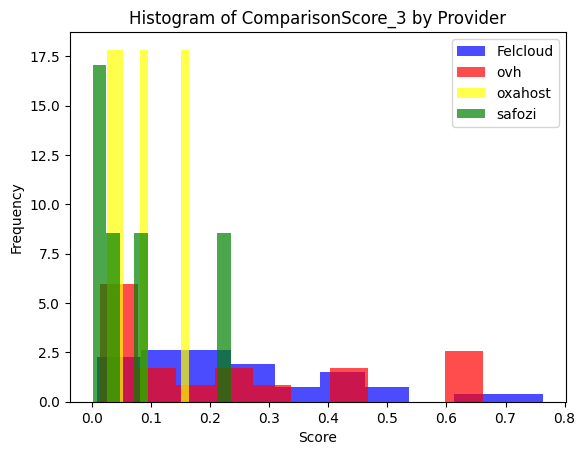

In [ ]:
labels = ['Score' , 'ComparisonScore_1', 'ComparisonScore_2', 'ComparisonScore_3']
providers = {'Felcloud': 'blue', 'ovh': 'red', 'oxahost': 'yellow', 'safozi': 'green'}
bins = 10

for label in labels:
    plt.figure()  # Create a new figure for each label

    for provider in providers:
        plt.hist(result_df[result_df["Provider"] == provider][label], color=providers[provider], bins=bins, alpha=0.7, density=True, label=provider)

    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {label} by Provider')
    plt.legend()
    plt.show()


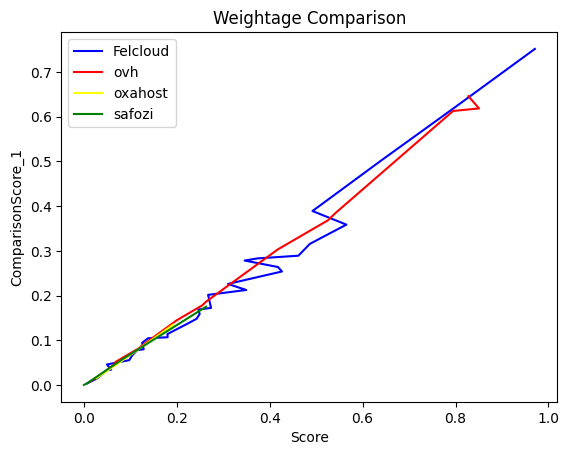

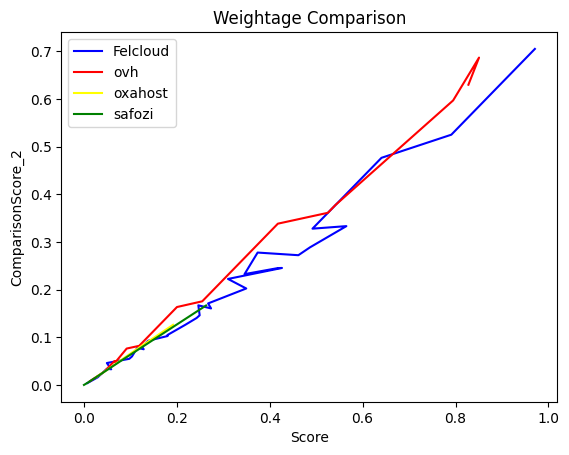

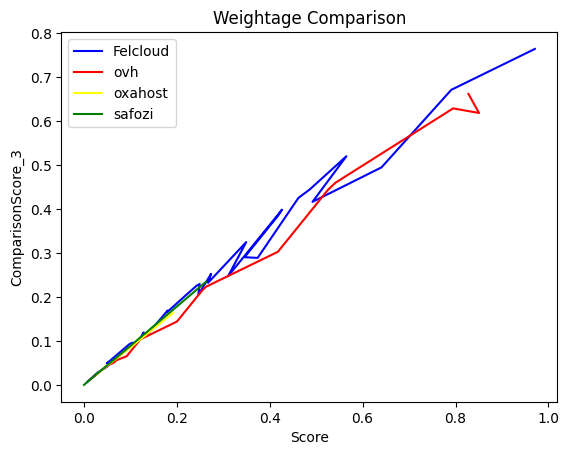

In [ ]:
labels = ['ComparisonScore_1', 'ComparisonScore_2', 'ComparisonScore_3']
providers = {'Felcloud': 'blue', 'ovh': 'red', 'oxahost': 'yellow', 'safozi': 'green'}

for label in labels:
    plt.figure()  # Create a new figure for each label

    for provider in providers:
        x_data = result_df[result_df["Provider"] == provider]['Score']
        y_data = result_df[result_df["Provider"] == provider][label]

        plt.plot(x_data, y_data, color=providers[provider], label=provider)
        #sns.relplot(
               # x=x_data, y=y_data, col='Weightage Comparison',
                #hue="smoker", style="smoker", size="size",
        #)

    plt.title('Weightage Comparison')
    plt.ylabel(label)
    plt.xlabel('Score')
    #plt.xscale('log')
    plt.legend()
    plt.show()
